In [4]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created December 10, 2022 for TRIPs-Py library
"""
__author__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from trips.solvers.GKS import GKSClass
from trips.decompositions import *
# from opera?tors import *
##Specify the font
##Latex needs to be installed! If not installed, please comment the following 5 lines
parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 12,
          'axes.titlesize': 18, 'axes.labelsize': 18, 'figure.titlesize': 14, 'legend.fontsize': 13}
plt.rcParams.update(parameters)
import time
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astra
# import phantoms as phantom
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.testProblems import *
from trips.solvers.GKS import GKSClass

Deblur = Deblurring()
imagesize_x = 64
imagesize_y = 64
A = Deblur.forward_Op([11,11], 0.5, imagesize_x, imagesize_y)
choose_image = 'satellite64'
generate_matrix = 'True'
x_true = Deblur.generate_true(choose_image)
b_true = Deblur.generate_data(x_true, generate_matrix)
(b, e) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
b_vec = b.reshape((-1,1))

I = pylops.Identity(imagesize_x*imagesize_y) # identity operator
D = first_derivative_operator(n=imagesize_x*imagesize_y) # first derivative operator
D2 = D @ D # second derivative operator

AttributeError: 'Deblurring' object has no attribute 'shape'

### run GKS with GCV

In [3]:
from scipy import linalg as la

In [4]:
max_iters = 30
solver = GKSClass(projection_dim=3, regparam='gcv', dp_stop=False, tol=10**(-16))
solver.run(A, b_vec, D, iter = max_iters, x_true=x_true)

running GKS...: 100%|██████████| 30/30 [00:07<00:00,  4.14it/s]


array([[ 0.0031363 ],
       [-0.00501709],
       [ 0.00349475],
       ...,
       [-0.0071669 ],
       [ 0.0081164 ],
       [-0.00715787]])

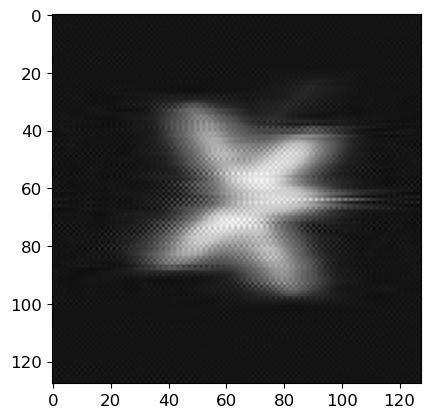

In [5]:
plt.imshow(solver.x.reshape(imagesize_x,imagesize_y), cmap='Greys_r')

### Convergence

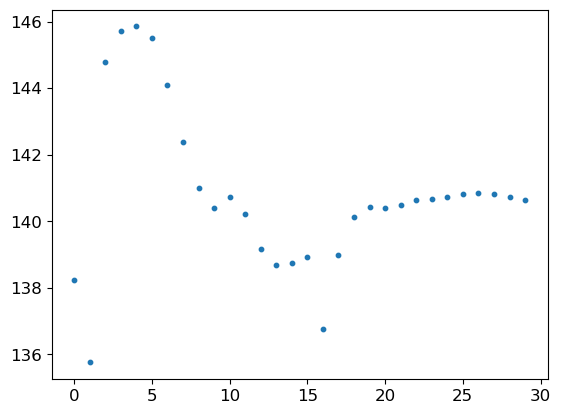

In [4]:
plt.scatter(range(len(solver.rre_history)), solver.rre_history, s=10)

### history of solutions

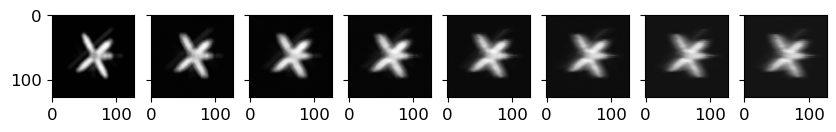

In [6]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(solver.x_history[ii].reshape(imagesize_x,imagesize_y), cmap='Greys_r')

plt.show()

### history of lambda values

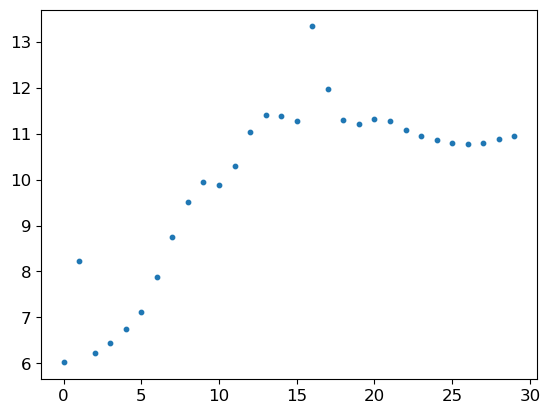

In [7]:
plt.scatter(range(len(solver.lambda_history)), solver.lambda_history, s=10)

### run GKS with DP

In [10]:
solver = GKSClass(projection_dim=3, regparam='dp', dp_stop=False, eta=1.01, delta=la.norm(e), tol=10**(-16))
solver.run(A, b_vec, D, iter=max_iters, x_true=x_true)

running GKS...:   0%|          | 0/30 [00:00<?, ?it/s]/Users/mirjetapasha/Documents/Research_Projects/TripsPY_May24/multiparameter_package/multiparameter_package/trips/parameter_selection/discrepancy_principle.py:53: RuntimeWarning: divide by zero encountered in true_divide
  beta_new = beta - f/f_prime
/Users/mirjetapasha/Documents/Research_Projects/TripsPY_May24/multiparameter_package/multiparameter_package/trips/parameter_selection/discrepancy_principle.py:56: RuntimeWarning: invalid value encountered in subtract
  if abs(beta_new - beta) < 10**(-7)* beta:
running GKS...: 100%|██████████| 30/30 [00:03<00:00,  9.56it/s]


array([[ 5.81324258e-03],
       [-1.18644308e-03],
       [ 5.92990953e-03],
       ...,
       [-7.27421047e-05],
       [-4.90232678e-03],
       [-9.21603189e-04]])

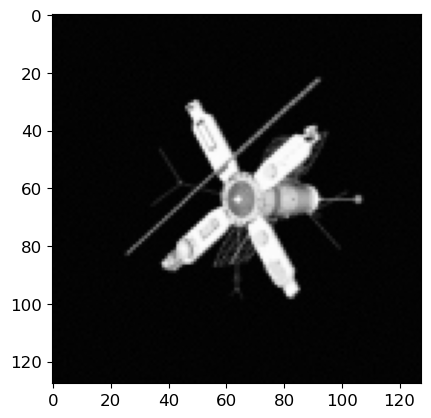

In [11]:
plt.imshow(solver.x.reshape(imagesize_x,imagesize_y), cmap='Greys_r')

### convergence

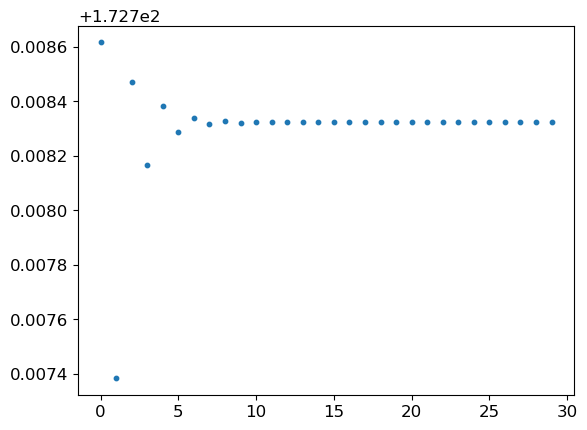

In [12]:
plt.scatter(range(len(solver.rre_history)), solver.rre_history, s=10)

### history of solutions

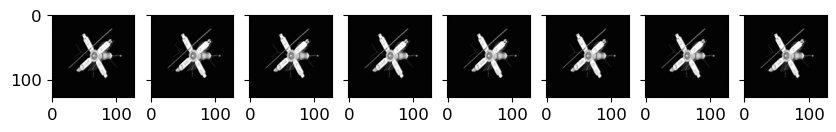

In [13]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(solver.x_history[ii].reshape(imagesize_x,imagesize_y), cmap='Greys_r')

plt.show()

### history of lambda values

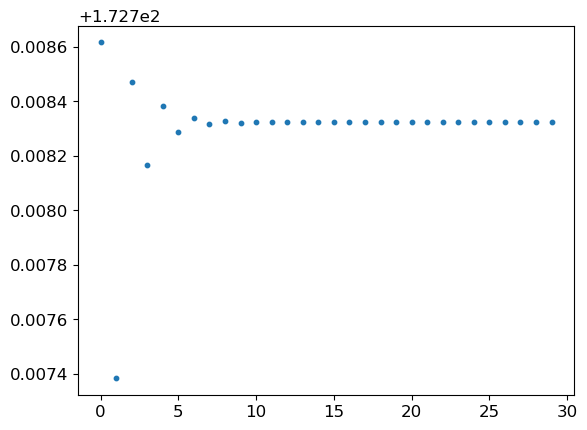

In [15]:
plt.scatter(range(len(solver.rre_history)), solver.rre_history, s=10)

### run GKS with a sequence of parameter values

In [16]:
regvals = [0.01*(0.8**(x)) for x in range(0,max_iters)]

In [18]:
solver = GKSClass(projection_dim=3, regparam=regvals, dp_stop=False, tol=10**(-16))
solver.run(A, b_vec, D, iter=max_iters, x_true=x_true)

running GKS...: 100%|██████████| 30/30 [00:02<00:00, 12.98it/s]


array([[ 5.81324657e-03],
       [-1.18645806e-03],
       [ 5.92993321e-03],
       ...,
       [-7.27245522e-05],
       [-4.90235065e-03],
       [-9.21594204e-04]])

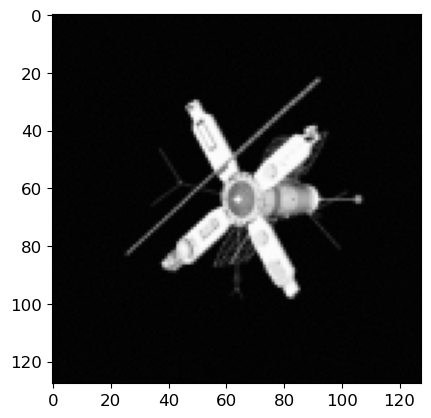

In [20]:
plt.imshow(solver.x.reshape(imagesize_x,imagesize_y), cmap='Greys_r')

### convergence

In [21]:
solver.rre_history

[172.7074729575873,
 172.7076612301959,
 172.70764471431184,
 172.70836135440788,
 172.70827789965682,
 172.7084208615084,
 172.70838760813334,
 172.70842930610692,
 172.7083618461069,
 172.7084033076978,
 172.70834516913902,
 172.70837272100064,
 172.70833634861526,
 172.70835234914617,
 172.70833222935326,
 172.70834040162646,
 172.70832944115563,
 172.70833447562669,
 172.70832674002094,
 172.7083301352271,
 172.70832564504786,
 172.70832781908547,
 172.70832494873363,
 172.70832626967777,
 172.7083247073053,
 172.70832543016036,
 172.70832454124383,
 172.70832494501178,
 172.7083244374993,
 172.70832465018682]

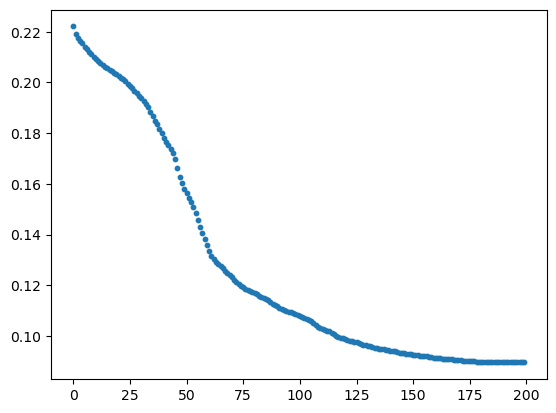

In [62]:
plt.scatter(range(len(solver.rre_history)), solver.rre_history, s=10)

### history of solutions

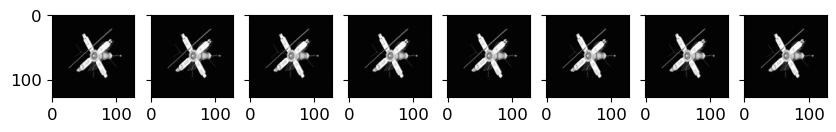

In [23]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(solver.x_history[ii].reshape(imagesize_x,imagesize_y), cmap='Greys_r')

plt.show()

### history of lambda values

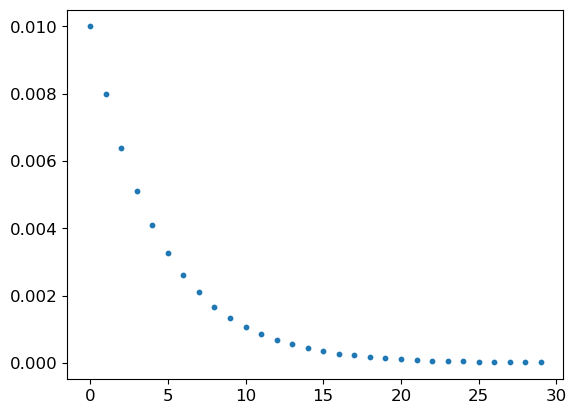

In [24]:
plt.scatter(range(len(solver.lambda_history)), solver.lambda_history, s=10)